In [ ]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


#1. Import and Prepare Data

###Data Dictionary
**TARGET_deathRate**: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

**avgAnnCount**: Mean number of reported cases of cancer diagnosed annually(a)

**avgDeathsPerYear**: Mean number of reported mortalities due to cancer(a)

**incidenceRate**: Mean per capita (100,000) cancer diagoses(a)

**medianIncome**: Median income per county (b)

**popEst2015**: Population of county (b)

**povertyPercent**: Percent of populace in poverty (b)

**studyPerCap**: Per capita number of cancer-related clinical trials per county (a)

**binnedInc**: Median income per capita binned by decile (b)

**MedianAge**: Median age of county residents (b)

**MedianAgeMale**: Median age of male county residents (b)

**MedianAgeFemale**: Median age of female county residents (b)

**Geography**: County name (b)

**AvgHouseholdSize**: Mean household size of county (b)

**PercentMarried**: Percent of county residents who are married (b)

**PctNoHS18_24**: Percent of county residents ages 18-24 highest education attained: less than high school (b)

**PctHS18_24**: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

**PctSomeCol18_24**: Percent of county residents ages 18-24 highest education attained: some college (b)

**PctBachDeg18_24**: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

**PctHS25_Over**: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

**PctBachDeg25_Over**: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

**PctEmployed16_Over**: Percent of county residents ages 16 and over employed (b)

**PctUnemployed16_Over**: Percent of county residents ages 16 and over unemployed (b)

**PctPrivateCoverage**: Percent of county residents with private health coverage (b)

**PctPrivateCoverageAlone**: Percent of county residents with private health coverage alone (no public assistance) (b)

**PctEmpPrivCoverage**: Percent of county residents with employee-provided private health coverage (b)

**PctPublicCoverage**: Percent of county residents with government-provided health coverage (b)

**PctPubliceCoverageAlone**: Percent of county residents with government-provided health coverage alone (b)

**PctWhite**: Percent of county residents who identify as White (b)

**PctBlack**: Percent of county residents who identify as Black (b)

**PctAsian**: Percent of county residents who identify as Asian (b)

**PctOtherRace**: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

**PctMarriedHouseholds**: Percent of married households (b)

**BirthRate**: Number of live births relative to number of women in county (b)

In [ ]:
URL = 'https://query.data.world/s/wwexdxbbtgdfvuzfkpnqm4aexnlkac'

df = pd.read_csv(URL, encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [ ]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

We have 3 columns that have missing values. So we would raplace them with the

---

mean

In [ ]:
df["PctSomeCol18_24"].fillna(df["PctSomeCol18_24"].mean, inplace = True)
df["PctEmployed16_Over"].fillna(df["PctEmployed16_Over"].mean, inplace = True)
df["PctPrivateCoverageAlone"].fillna(df["PctPrivateCoverageAlone"].mean, inplace = True)


In [ ]:
df.tail()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938
3046,1962.667684,48,213.6,453.549422,41193,37030,13.9,0.000000,"(40362.7, 42724.4]",26.2,...,60.3,22.9,25.1,12.6,70.098132,16.590100,3.177753,1.356457,56.040242,8.981723


In [ ]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [ ]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,64.354939,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.647057,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,22.300000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,57.200000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,65.100000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,72.100000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,92.300000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


#2 Exploratory data analysis

We will focus on describe categories of the 'TARGET_deathRate' attribute.

In [ ]:
df['TARGET_deathRate'].value_counts().to_frame()

,TARGET_deathRate
184.3,11
179.9,10
182.8,10
173.6,10
176.4,10
...,...
141.1,1
141.5,1
152.0,1
143.3,1


##Looking for Correlations

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['TARGET_deathRate'][:-1] # -1 means that the latest row is SalePrice
df_num_corr.sort_values(ascending=False)

TARGET_deathRate          1.000000
incidenceRate             0.449432
PctPublicCoverageAlone    0.449358
povertyPercent            0.429389
PctHS25_Over              0.404589
PctPublicCoverage         0.404572
PctUnemployed16_Over      0.378412
PctHS18_24                0.261976
PctBlack                  0.257024
PctNoHS18_24              0.088463
MedianAgeFemale           0.012048
MedianAge                 0.004375
MedianAgeMale            -0.021929
studyPerCap              -0.022285
AvgHouseholdSize         -0.036905
avgDeathsPerYear         -0.090715
popEst2015               -0.120073
avgAnnCount              -0.143532
PctWhite                 -0.177400
PctAsian                 -0.186331
PctOtherRace             -0.189894
PercentMarried           -0.266820
PctEmpPrivCoverage       -0.267399
PctBachDeg18_24          -0.287817
PctMarriedHouseholds     -0.293325
PctPrivateCoverage       -0.386066
medIncome                -0.428615
PctBachDeg25_Over        -0.485477
Name: TARGET_deathRa

IncidenceRate (Mean per capita (100,000) cancer diagoses) has directly proportional to TARGET_deathRate because the more people get cancer the higher mortality rate


While PctBachDeg25_Over (Percent of county residents ages 25 and over highest education attained: bachelor's degree) has inversely proportional to to TARGET_deathRate because The higher the education, the higher the knowledge about health. People may known how to reduce cancer ratio

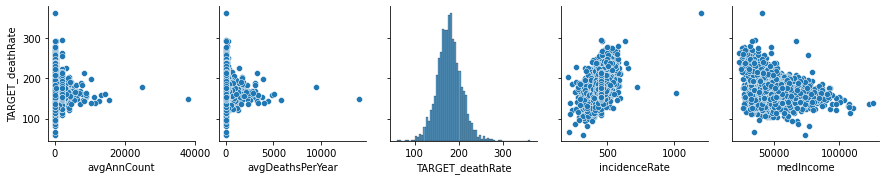

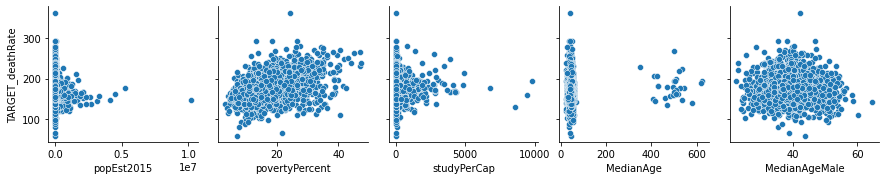

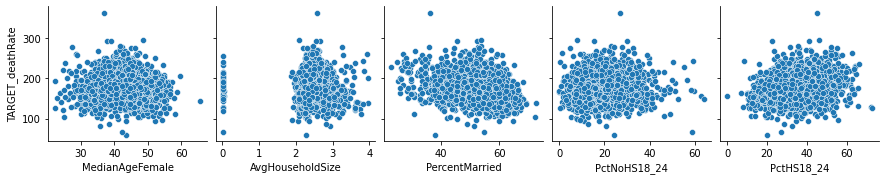

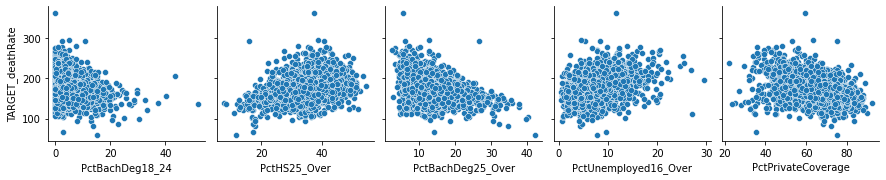

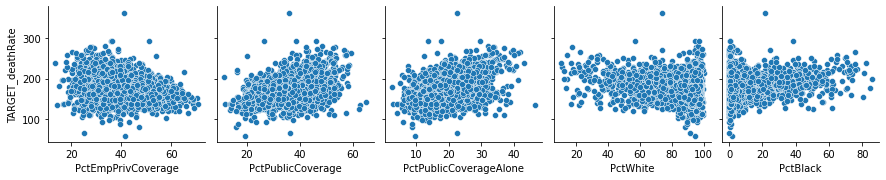

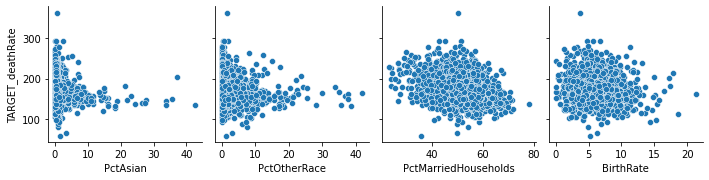

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['TARGET_deathRate'])

In [ ]:
df_num.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctEmpPrivCoverage', 'PctPublicCoverage',
       'PctPublicCoverageAlone', 'PctWhite', 'PctBlack', 'PctAsian',
       'PctOtherRace', 'PctMarriedHouseholds', 'BirthRate'],
      dtype='object')

[văn bản liên kết](https://) # 3.Linear Regression Model

## Linear Regression model with scikit-learn library

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_num.drop("TARGET_deathRate", axis=1), df_num["TARGET_deathRate"], test_size=0.2)


In [ ]:
# fit the data into a linear regression model
model = LinearRegression().fit(X_train, y_train)

# evaluate the model on the test set
test_score = model.score(X_test, y_test)

print("R-squared: ", test_score)

R-squared:  0.5774771835890614


## Linear Regression model with statsmodels library

In [ ]:
y = df_num["TARGET_deathRate"]
X = df_num.drop("TARGET_deathRate", axis=1)
# add a constant to the independent variables for the intercept term
X = sm.add_constant(X)

# fit the data into a linear regression model using OLS
model2 = sm.OLS(y, X).fit()

# get the model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     116.2
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:12:06   Log-Likelihood:                -13335.
No. Observations:                3047   AIC:                         2.673e+04
Df Residuals:                    3018   BIC:                         2.690e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    121

Both 2 model give more than 50% R-squared score

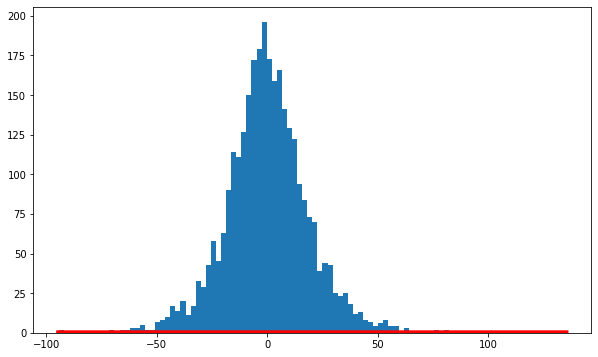

In [ ]:
plt.figure(figsize=(10,6))
import scipy.stats as stats
mu = np.mean(model2.resid)
sigma = np.std(model2.resid)
pdf = stats.norm.pdf(sorted(model2.resid), mu, sigma)
plt.hist(model2.resid, bins=100)
plt.plot(sorted(model2.resid), pdf, color='r', linewidth=5)
plt.show()

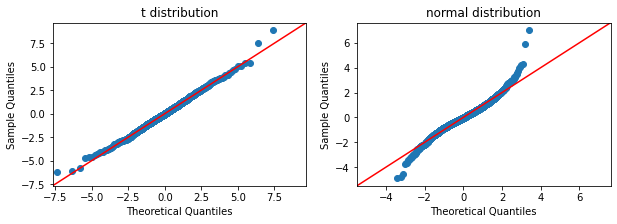

In [ ]:
# QQplot
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10,3))
sm.qqplot(model2.resid, stats.t, fit=True, line='45', ax = ax1)
ax1.set_title("t distribution")
sm.qqplot(model2.resid, stats.norm, fit=True, line='45', ax=ax2)
ax2.set_title("normal distribution")
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


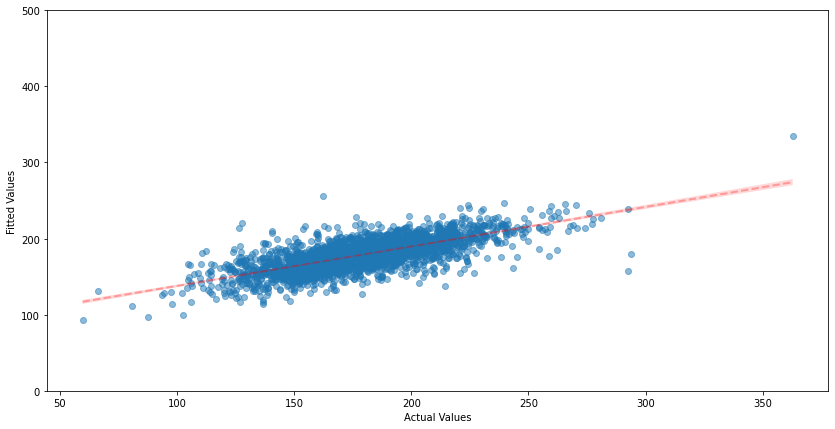

Pearson R:  PearsonRResult(statistic=0.7202445489002657, pvalue=0.0)


In [ ]:
# plot predicted vs actual
plt.figure(figsize=(14,7))
sns.regplot(y, model2.fittedvalues, line_kws={'color':'r', 'alpha':0.3,
                                              'linestyle':'--', 'linewidth':2},
            scatter_kws={'alpha':0.5})
plt.ylim(0,500)
plt.xlabel('Actual Values')
plt.ylabel('Fitted Values')
plt.show()
print("Pearson R: ", stats.pearsonr(model2.fittedvalues, y))

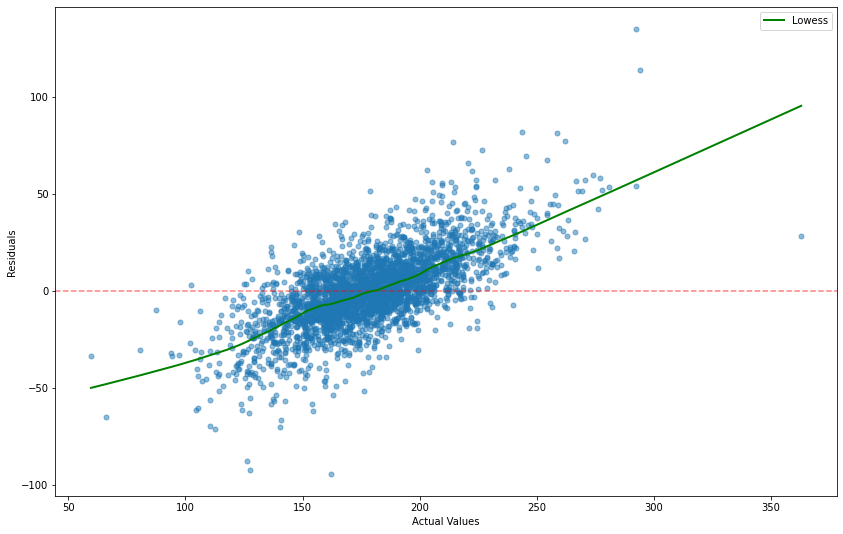

Pearson R: PearsonRResult(statistic=0.6937202532573332, pvalue=0.0)


In [ ]:
# plot actual values versus residuals
from statsmodels.nonparametric.smoothers_lowess import lowess
ys = lowess(model2.resid.values, y, frac=0.2)
ys = pd.DataFrame(ys, index=range(len(ys)), columns=['a', 'b'])
ys = ys.sort_values(by='a')

fig, ax = plt.subplots(figsize=(14,9))
plt.scatter(y, model2.resid, alpha=0.5, s=25)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")

plt.plot(ys.a, ys.b, c='green', linewidth=2, label="Lowess")
plt.legend()
plt.show()
print("Pearson R:", stats.pearsonr(y, model2.resid))

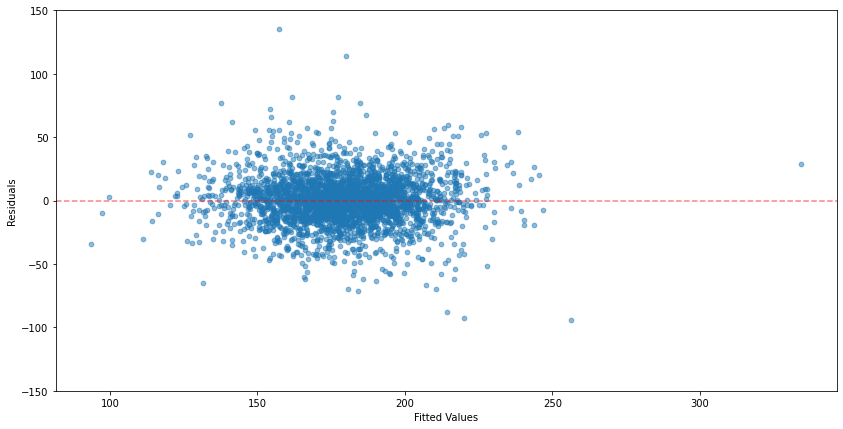

In [ ]:
# plot actual values versus residuals
plt.figure(figsize=(14,7))
plt.scatter(y=model2.resid, x=model2.fittedvalues, alpha=0.5, s=22)
plt.axhline(y=0, color='r', linestyle="--", alpha=0.5)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylim(-150, 150)
plt.show()